In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
import seaborn as sns

In [3]:
df = pd.read_csv('mammography.csv')
df.head()

target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class='-1', Count=10922, Percentage=97.675%
Class='1', Count=260, Percentage=2.325%


([<matplotlib.axis.XTick at 0x1f34df6ddc0>,
 [Text(0, 0, 'Cancer'), Text(1, 0, 'No Cancer')])

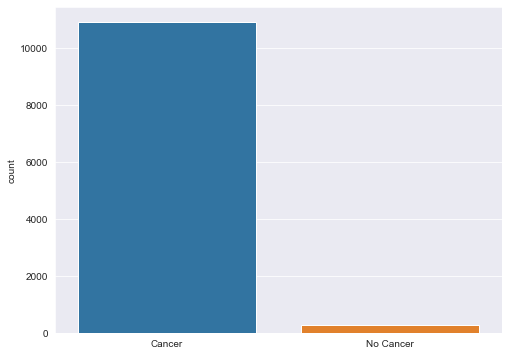

In [4]:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= target, data= df)
Labels= ('Cancer', 'No Cancer')
plt.xticks(range(2), Labels)

In [5]:
# load the dataset
def load_dataset(full_path):
	# load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	# retrieve numpy array
	data = data.values
	# split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	# label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y

In [7]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
X, y = load_dataset('mammography.csv')

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

Recall Score  0.34615384615384615
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3277
           1       0.71      0.35      0.47        78

    accuracy                           0.98      3355
   macro avg       0.85      0.67      0.73      3355
weighted avg       0.98      0.98      0.98      3355



<AxesSubplot:>

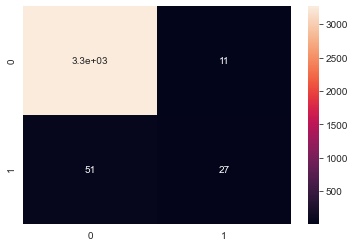

In [8]:
model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [9]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After UnderSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before UnderSampling, counts of label '1': 182
Before UnderSampling, counts of label '0': 7646 

After UnderSampling, the shape of train_X: (364, 6)
After UnderSampling, the shape of train_y: (364,) 

After UnderSampling, counts of label '1': 182
After UnderSampling, counts of label '0': 182


([<matplotlib.axis.XTick at 0x1f35044e3d0>,
 [Text(0, 0, 'Cancer'), Text(1, 0, 'No Cancer')])

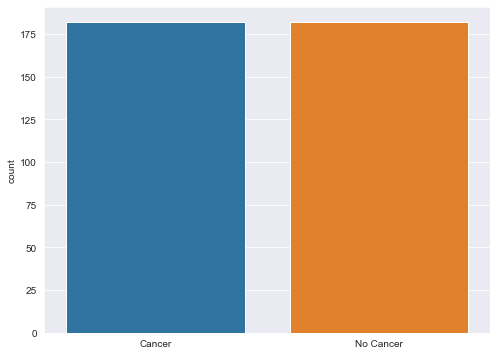

In [10]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Cancer', 'No Cancer')
plt.xticks(range(2), Labels)

Recall Score  0.8717948717948718
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3277
           1       0.16      0.87      0.27        78

    accuracy                           0.89      3355
   macro avg       0.58      0.88      0.60      3355
weighted avg       0.98      0.89      0.92      3355



<AxesSubplot:>

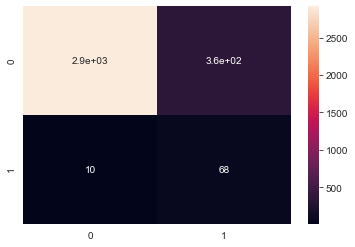

In [11]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [12]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = RandomOverSampler()
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 182
Before OverSampling, counts of label '0': 7646 

After OverSampling, the shape of train_X: (15292, 6)
After OverSampling, the shape of train_y: (15292,) 

After OverSampling, counts of label '1': 7646
After OverSampling, counts of label '0': 7646


([<matplotlib.axis.XTick at 0x1f35153b3a0>,
 [Text(0, 0, 'Cancer'), Text(1, 0, 'No Cancer')])

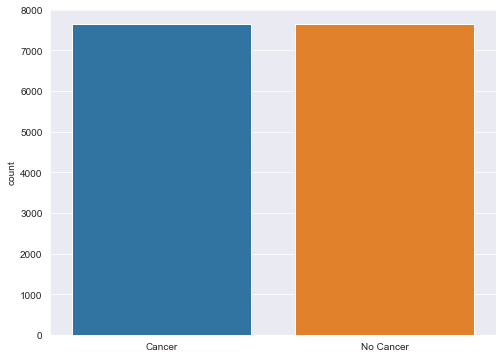

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Cancer', 'No Cancer')
plt.xticks(range(2), Labels)

Recall Score  0.8846153846153846
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3277
           1       0.18      0.88      0.30        78

    accuracy                           0.90      3355
   macro avg       0.59      0.89      0.62      3355
weighted avg       0.98      0.90      0.93      3355



<AxesSubplot:>

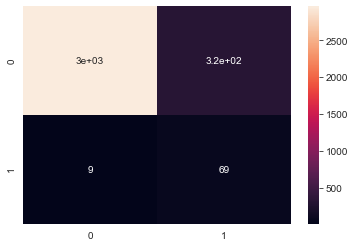

In [14]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [15]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
from imblearn.over_sampling import SMOTE
sm = SMOTE() 
X_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 182
Before OverSampling, counts of label '0': 7646 

After OverSampling, the shape of train_X: (15292, 6)
After OverSampling, the shape of train_y: (15292,) 

After OverSampling, counts of label '1': 7646
After OverSampling, counts of label '0': 7646


([<matplotlib.axis.XTick at 0x1f351604490>,
 [Text(0, 0, 'Cancer'), Text(1, 0, 'No Cancer')])

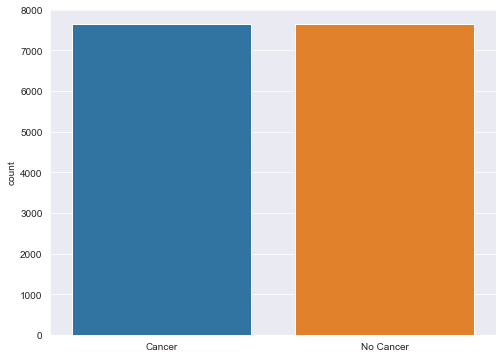

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Cancer', 'No Cancer')
plt.xticks(range(2), Labels)

Recall Score  0.8717948717948718
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3277
           1       0.18      0.87      0.29        78

    accuracy                           0.90      3355
   macro avg       0.59      0.89      0.62      3355
weighted avg       0.98      0.90      0.93      3355



<AxesSubplot:>

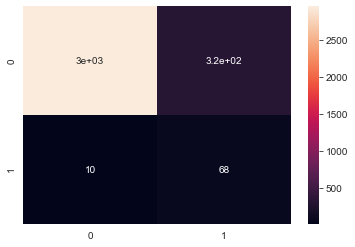

In [17]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [18]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 


# trying BorderLineSMOTE
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 182
Before OverSampling, counts of label '0': 7646 

After OverSampling, the shape of train_X: (15292, 6)
After OverSampling, the shape of train_y: (15292,) 

After OverSampling, counts of label '1': 7646
After OverSampling, counts of label '0': 7646


([<matplotlib.axis.XTick at 0x1f3516e1940>,
 [Text(0, 0, 'Cancer'), Text(1, 0, 'No Cancer')])

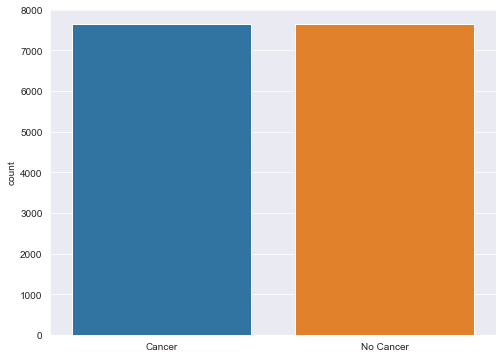

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Cancer', 'No Cancer')
plt.xticks(range(2), Labels)

Recall Score  0.9102564102564102
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3277
           1       0.16      0.91      0.27        78

    accuracy                           0.89      3355
   macro avg       0.58      0.90      0.60      3355
weighted avg       0.98      0.89      0.92      3355



<AxesSubplot:>

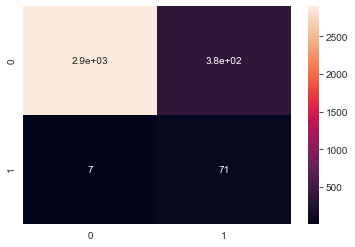

In [20]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# trying ADASYN
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 182
Before OverSampling, counts of label '0': 7646 

After OverSampling, the shape of train_X: (15289, 6)
After OverSampling, the shape of train_y: (15289,) 

After OverSampling, counts of label '1': 7643
After OverSampling, counts of label '0': 7646


([<matplotlib.axis.XTick at 0x1f3517bfc70>,
 [Text(0, 0, 'Cancer'), Text(1, 0, 'No Cancer')])

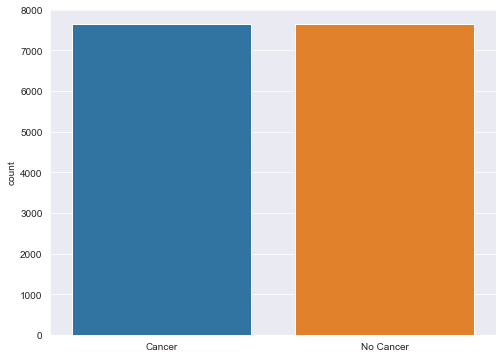

In [22]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Cancer', 'No Cancer')
plt.xticks(range(2), Labels)

Recall Score  0.9487179487179487
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3277
           1       0.12      0.95      0.21        78

    accuracy                           0.83      3355
   macro avg       0.56      0.89      0.56      3355
weighted avg       0.98      0.83      0.89      3355



<AxesSubplot:>

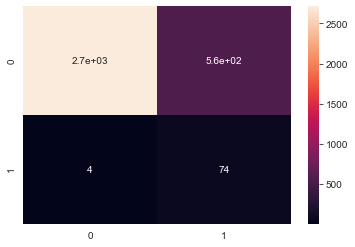

In [23]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [24]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
# trying BorderLineSVM
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()
X_train_res, y_train_res = oversample.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': 182
Before OverSampling, counts of label '0': 7646 

After OverSampling, the shape of train_X: (15292, 6)
After OverSampling, the shape of train_y: (15292,) 

After OverSampling, counts of label '1': 7646
After OverSampling, counts of label '0': 7646


([<matplotlib.axis.XTick at 0x1f3518a1160>,
 [Text(0, 0, 'Cancer'), Text(1, 0, 'No Cancer')])

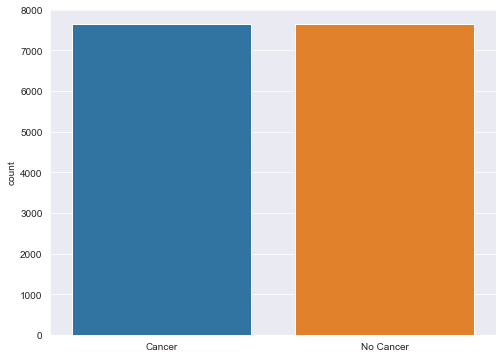

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Cancer', 'No Cancer')
plt.xticks(range(2), Labels)

Recall Score  0.8717948717948718
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3277
           1       0.22      0.87      0.35        78

    accuracy                           0.92      3355
   macro avg       0.61      0.90      0.65      3355
weighted avg       0.98      0.92      0.95      3355



<AxesSubplot:>

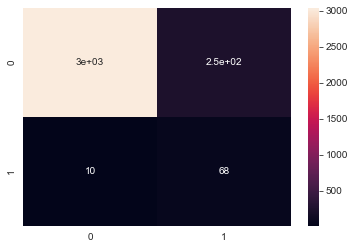

In [26]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
 
undersample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_res, y_train_res = undersample.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 182
Before OverSampling, counts of label '0': 7646 

After OverSampling, the shape of train_X: (15271, 6)
After OverSampling, the shape of train_y: (15271,) 

After OverSampling, counts of label '1': 7646
After OverSampling, counts of label '0': 7625


([<matplotlib.axis.XTick at 0x1f35294fb80>,
 [Text(0, 0, 'Cancer'), Text(1, 0, 'No Cancer')])

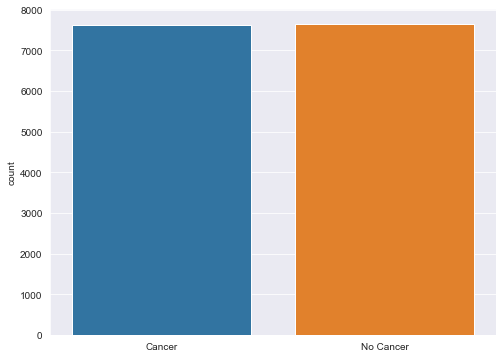

In [28]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x= y_train_res, data= df)
Labels= ('Cancer', 'No Cancer')
plt.xticks(range(2), Labels)

Recall Score  0.8717948717948718
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3277
           1       0.17      0.87      0.29        78

    accuracy                           0.90      3355
   macro avg       0.58      0.89      0.62      3355
weighted avg       0.98      0.90      0.93      3355



<AxesSubplot:>

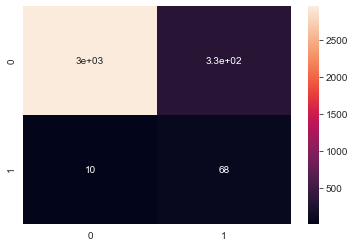

In [29]:
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
pred = model.predict(x_test)
print('Recall Score ',recall_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')